In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import datetime
from datetime import datetime

In [2]:
taxi = pd.read_csv('/Users/Mahran/Desktop/Dataset/taxi_trip_data.csv')

# Clean an explore the data

In [3]:
taxi.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In [5]:
taxi.isna().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

In [11]:
taxi.dtypes

vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
trip_distance          float64
rate_code                int64
store_and_fwd_flag      object
payment_type             int64
fare_amount            float64
extra                  float64
mta_tax                float64
tip_amount             float64
tolls_amount           float64
imp_surcharge          float64
total_amount           float64
pickup_location_id       int64
dropoff_location_id      int64
dtype: object

A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc

In [4]:
taxi['vendor_id'].unique()

array([2, 1, 4], dtype=int64)

In [5]:
taxi['pickup_datetime']

0          2018-03-29 13:37:13
1          2018-03-29 13:37:18
2          2018-03-29 13:26:57
3          2018-03-29 13:07:48
4          2018-03-29 14:19:11
                  ...         
9999995    2018-03-29 12:16:01
9999996    2018-03-29 12:26:25
9999997    2018-03-29 12:22:12
9999998    2018-03-29 13:57:40
9999999    2018-03-29 13:29:40
Name: pickup_datetime, Length: 10000000, dtype: object

In [11]:
taxi['pickup_datetime'].str.split(expand=True)


,0,1
0,2018-03-29,13:37:13
1,2018-03-29,13:37:18
2,2018-03-29,13:26:57
3,2018-03-29,13:07:48
4,2018-03-29,14:19:11
...,...,...
9999995,2018-03-29,12:16:01
9999996,2018-03-29,12:26:25
9999997,2018-03-29,12:22:12
9999998,2018-03-29,13:57:40


In [13]:
taxi.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.614328e+00,1.602949e+00,8.849280e+00,1.201239e+00,1.189299e+00,3.165255e+01,3.383781e-01,4.819289e-01,5.598527e+00,2.137918e+00,2.978831e-01,4.051607e+01,1.535632e+02,1.481428e+02
std,5.146576e-01,1.245782e+00,5.882028e+00,1.250733e+00,4.339876e-01,1.606011e+02,5.512911e-01,1.207282e-01,4.840596e+00,3.750309e+00,3.406027e-02,1.611634e+02,6.076456e+01,7.574853e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+02,-8.000000e+01,-5.000000e-01,-3.224200e+02,-5.250000e+01,-3.000000e-01,-8.003000e+02,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,5.820000e+00,1.000000e+00,1.000000e+00,2.350000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,2.906000e+01,1.320000e+02,8.800000e+01
50%,2.000000e+00,1.000000e+00,8.480000e+00,1.000000e+00,1.000000e+00,2.850000e+01,0.000000e+00,5.000000e-01,5.560000e+00,0.000000e+00,3.000000e-01,3.730000e+01,1.380000e+02,1.420000e+02
75%,2.000000e+00,2.000000e+00,1.110000e+01,1.000000e+00,1.000000e+00,3.700000e+01,5.000000e-01,5.000000e-01,7.960000e+00,5.760000e+00,3.000000e-01,4.906000e+01,1.860000e+02,2.290000e+02
max,4.000000e+00,9.000000e+00,7.655760e+03,9.900000e+01,5.000000e+00,3.984600e+05,8.400000e+01,1.500000e+02,4.960000e+02,9.182500e+02,1.000000e+00,3.985220e+05,2.650000e+02,2.650000e+02


In [16]:
corr = taxi.corr()
corr

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
vendor_id,1.000000,0.204459,0.026503,0.008468,-0.044634,0.002382,0.004161,0.000053,0.017867,0.013254,-0.042431,0.003266,-0.020173,-0.015609
passenger_count,0.204459,1.000000,0.015538,-0.019168,0.001654,0.000497,0.003086,0.003839,-0.004532,0.011868,-0.005870,0.000657,-0.008251,-0.007149
trip_distance,0.026503,0.015538,1.000000,0.073329,-0.102468,0.080784,0.062519,-0.046025,0.353048,0.359243,0.086897,0.099661,-0.099401,-0.080446
rate_code,0.008468,-0.019168,0.073329,1.000000,0.004373,0.039654,-0.020587,-0.256576,0.134218,0.132311,-0.055527,0.046348,0.027811,0.021189
payment_type,-0.044634,0.001654,-0.102468,0.004373,1.000000,-0.012501,-0.006686,-0.108675,-0.504782,-0.092042,-0.248566,-0.029942,-0.001766,0.005572
fare_amount,0.002382,0.000497,0.080784,0.039654,-0.012501,1.000000,0.029745,-0.018220,0.050622,0.039775,0.011932,0.999048,-0.005281,-0.005576
extra,0.004161,0.003086,0.062519,-0.020587,-0.006686,0.029745,1.000000,0.062343,0.013313,-0.007381,0.071501,0.033348,-0.022423,-0.008532
mta_tax,0.000053,0.003839,-0.046025,-0.256576,-0.108675,-0.018220,0.062343,1.000000,-0.136198,-0.226153,0.441885,-0.026451,-0.028800,0.076970
tip_amount,0.017867,-0.004532,0.353048,0.134218,-0.504782,0.050622,0.013313,-0.136198,1.000000,0.331534,0.062141,0.088158,-0.017687,-0.026409
tolls_amount,0.013254,0.011868,0.359243,0.132311,-0.092042,0.039775,-0.007381,-0.226153,0.331534,1.000000,0.035610,0.072675,-0.021549,-0.038396


<AxesSubplot:>

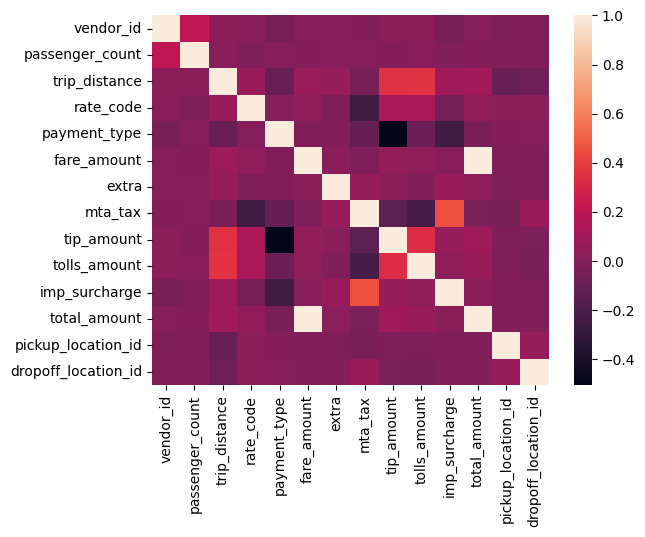

In [18]:
sns.heatmap(corr)

In [32]:
std = taxi.std()
std

C:\Users\Mahran\AppData\Local\Temp\ipykernel_10028\1108393562.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = taxi.std()


vendor_id                0.514658
passenger_count          1.245782
trip_distance            5.882028
rate_code                1.250733
payment_type             0.433988
fare_amount            160.601139
extra                    0.551291
mta_tax                  0.120728
tip_amount               4.840596
tolls_amount             3.750309
imp_surcharge            0.034060
total_amount           161.163369
pickup_location_id      60.764556
dropoff_location_id     75.748528
dtype: float64

In [25]:
taxi.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In [26]:
taxi['pickup_datetime'].min()

'2001-01-01 00:07:04'

In [27]:
taxi['pickup_datetime'].max()

'2053-07-11 13:25:33'

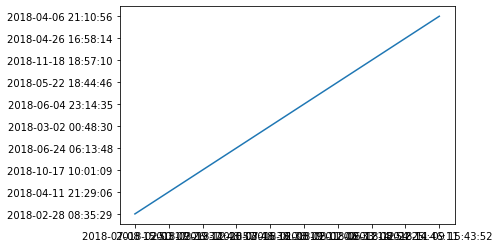

In [38]:
x = taxi['pickup_datetime'].sample(10)
y = taxi['dropoff_datetime'].sample(10)
plt.plot(x,y)

In [55]:
trip = taxi.iloc[1:,1:3]
trip

,pickup_datetime,dropoff_datetime
1,2018-03-29 13:37:18,2018-03-29 14:15:33
2,2018-03-29 13:26:57,2018-03-29 13:28:03
3,2018-03-29 13:07:48,2018-03-29 14:03:05
4,2018-03-29 14:19:11,2018-03-29 15:19:59
5,2018-03-29 14:52:55,2018-03-29 15:51:55
...,...,...
9999995,2018-03-29 12:16:01,2018-03-29 13:03:31
9999996,2018-03-29 12:26:25,2018-03-29 13:09:54
9999997,2018-03-29 12:22:12,2018-03-29 13:01:07
9999998,2018-03-29 13:57:40,2018-03-29 15:07:42


In [80]:
trip['pickup_time'] =trip['pickup_datetime'].str.extract(r'(\s........)')
trip['dropoff_time'] = trip['dropoff_datetime'].str.extract(r'(\s........)')
trip['pickup_date'] =trip['pickup_datetime'].str.extract(r'(^\d.........)')
trip['dropoff_date'] = trip['dropoff_datetime'].str.extract(r'(^\d.........)')

In [81]:
trip

,pickup_datetime,dropoff_datetime,pickup_time,dropoff_time,pickup_date,dropoff_date
1,2018-03-29 13:37:18,2018-03-29 14:15:33,13:37:18,14:15:33,2018-03-29,2018-03-29
2,2018-03-29 13:26:57,2018-03-29 13:28:03,13:26:57,13:28:03,2018-03-29,2018-03-29
3,2018-03-29 13:07:48,2018-03-29 14:03:05,13:07:48,14:03:05,2018-03-29,2018-03-29
4,2018-03-29 14:19:11,2018-03-29 15:19:59,14:19:11,15:19:59,2018-03-29,2018-03-29
5,2018-03-29 14:52:55,2018-03-29 15:51:55,14:52:55,15:51:55,2018-03-29,2018-03-29
...,...,...,...,...,...,...
9999995,2018-03-29 12:16:01,2018-03-29 13:03:31,12:16:01,13:03:31,2018-03-29,2018-03-29
9999996,2018-03-29 12:26:25,2018-03-29 13:09:54,12:26:25,13:09:54,2018-03-29,2018-03-29
9999997,2018-03-29 12:22:12,2018-03-29 13:01:07,12:22:12,13:01:07,2018-03-29,2018-03-29
9999998,2018-03-29 13:57:40,2018-03-29 15:07:42,13:57:40,15:07:42,2018-03-29,2018-03-29


In [134]:
dates = trip.iloc[:,3:]
dates

,dropoff_time,pickup_date,dropoff_date
1,14:15:33,2018-03-29,2018-03-29
2,13:28:03,2018-03-29,2018-03-29
3,14:03:05,2018-03-29,2018-03-29
4,15:19:59,2018-03-29,2018-03-29
5,15:51:55,2018-03-29,2018-03-29
...,...,...,...
9999995,13:03:31,2018-03-29,2018-03-29
9999996,13:09:54,2018-03-29,2018-03-29
9999997,13:01:07,2018-03-29,2018-03-29
9999998,15:07:42,2018-03-29,2018-03-29
